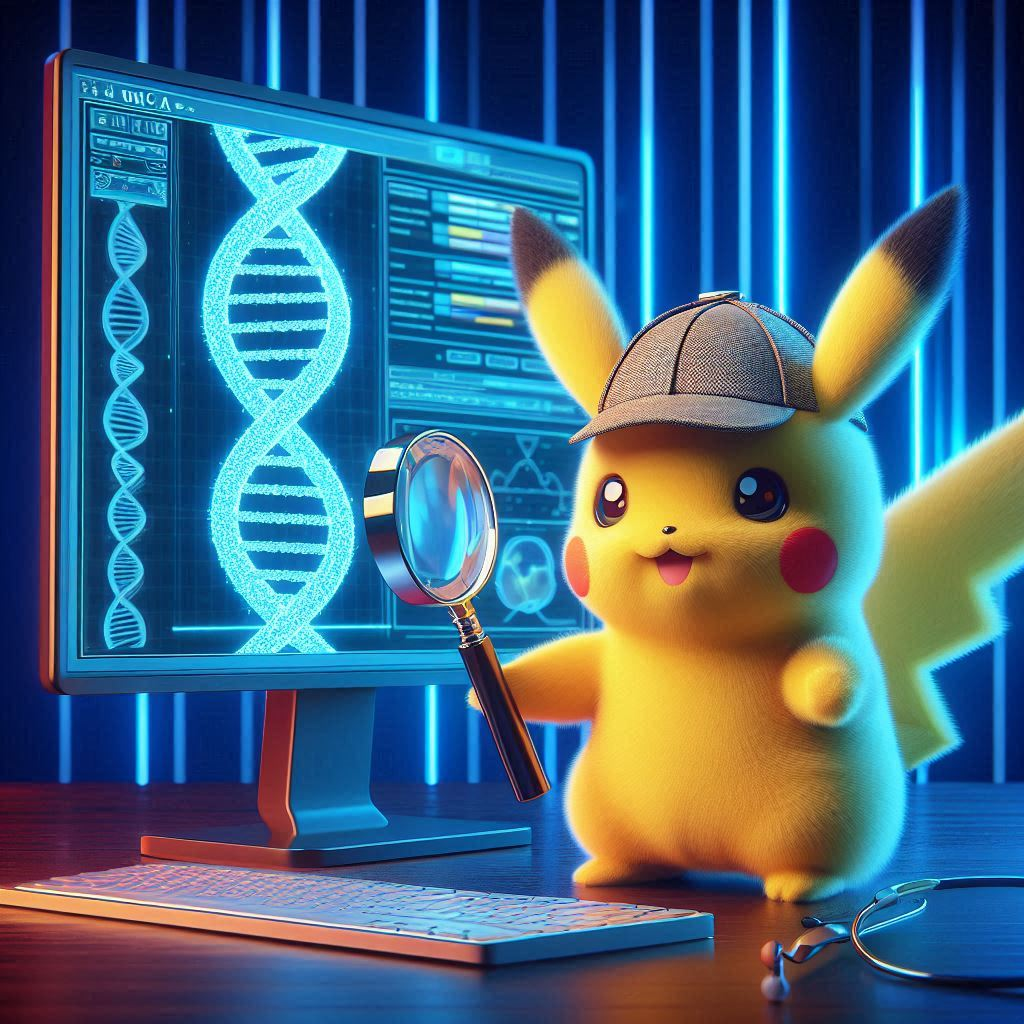
**Bioinformatics Night!**

**Analyzing Text Data and Tag Frequencies:**

This Python code snippet demonstrates a workflow for preprocessing and analyzing text data and associated tags. Here's a step-by-step explanation:

**Data Loading and Preprocessing:**

The code begins by loading the training and validation data files (assumed to be in tab-separated format) using a function read_data(filename) that reads and cleans the data, converting the 'tags' column into list format.

**Text Preparation:**

A function text_prepare(text) is defined to normalize and clean the text data. It converts the text to lowercase, removes special characters and symbols, and filters out English stopwords using regex and the NLTK libraries.

**Applying Text Preparation:**

The text_prepare function is applied to both the training and validation datasets (X_train and X_val). This prepares the text data by removing noise and standardizing the format, making it suitable for further analysis.

**Word Frequency Analysis:**

Word frequencies are then counted using Python's Counter class from the collections module. This counts how often each word appears in the cleaned training data (words_counts).

**Visualization:**

The top 10 most frequent words and their occurrences are visualized using a bar plot (sns.barplot). This plot helps understand which words are most prevalent in the dataset after preprocessing.

**Tag Frequency Analysis:**

Similarly, the code counts the frequencies of tags (assumed to be categorical labels) in the training data (tags_counts). This provides insight into which tags appear most frequently in the dataset.

**Tag Visualization:**

The top 10 most frequent tags are visualized using another bar plot. This plot helps understand the distribution of tags in the dataset, which is crucial for tasks like classification or tagging.

**Educational Context:**

This code snippet serves as a practical introduction to text data preprocessing, including techniques for cleaning, normalization, and frequency analysis. It also introduces basic data visualization techniques to understand the distribution of words and tags in a dataset.

**Key Concepts:**
Data preprocessing, text cleaning, normalization, frequency analysis, data visualization.

# Step 1: Allow access to Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 2: Extract text from the ".pdf" file and analyze its content

In [ ]:
!pip install PyPDF2 matplotlib
import PyPDF2
import pandas as pd


# Função para extrair o texto do PDF
def extract_pdf_text(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in range(len(reader.pages)):
            text += reader.pages[page].extract_text()
    return text

# Função principal para carregar o PDF, contar as palavras e gerar o gráfico
def search_words_in_pdf(pdf_path, table_path):
    # Carregar o texto do PDF
    pdf_text = extract_pdf_text(pdf_path)

    # Carregar as palavras do CSV (supondo que o arquivo tenha uma coluna 'title')
    table = pd.read_csv(table_path)
    words_to_search = table['title'].tolist()

    # Contar as ocorrências das palavras
    word_counts = count_word_occurrences(pdf_text, words_to_search)

    palavras = []
    ocorrencias = []

    for word, count in word_counts.items():
        print(f"A palavra '{word}' foi encontrada {count} vezes.")
        palavras.append(word)
        ocorrencias.append(count)

    # Gerar o gráfico de pizza
    gerar_grafico_pizza(palavras, ocorrencias)

    # Retornar os dados
    return palavras, ocorrencias


# Step 3: Calculate how many times the words provided in the ".csv" table file were found

In [ ]:
import re

# Função para contar ocorrências das palavras no texto
def count_word_occurrences(text, words):
    word_counts = {}
    for word in words:
        word_counts[word] = len(re.findall(r'\b' + re.escape(word) + r'\b', text, re.IGNORECASE))
    return word_counts


# Step 4: Separating and organizing data to create statistical graphs

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Função para gerar o gráfico de pizza
def gerar_grafico_pizza(palavras, ocorrencias):
    # Organizar os dados em um DataFrame
    df = pd.DataFrame({
        'Palavras': palavras,
        'Ocorrências': ocorrencias
    })

    # Calcular o total de ocorrências para as porcentagens
    total_ocorrencias = sum(ocorrencias)
    porcentagens = [ocorrencia / total_ocorrencias * 100 for ocorrencia in ocorrencias]

    # Criar gráfico de pizza
    plt.figure(figsize=(8, 8))
    plt.pie(porcentagens, labels=palavras, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

    # Adicionar título
    plt.title('Distribuição das Ocorrências')

    # Mostrar gráfico
    plt.show()


# Step 5: Creating graphs to visualize statistical results dynamically and objectively after training

To use other files in the program, simply change the addresses of the files below and run again :3

A palavra 'menina' foi encontrada 374 vezes.
A palavra 'livros' foi encontrada 166 vezes.
A palavra 'pai' foi encontrada 244 vezes.
A palavra 'irmao' foi encontrada 0 vezes.
A palavra 'roubava' foi encontrada 62 vezes.
A palavra 'alemanha' foi encontrada 25 vezes.


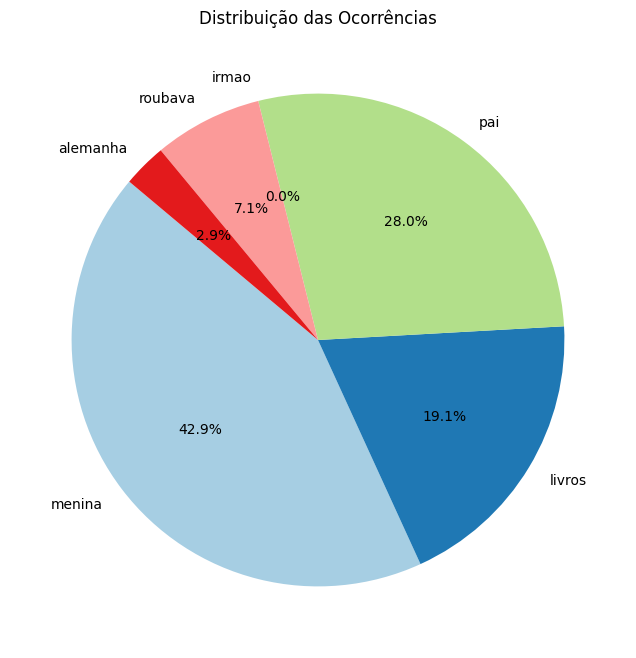

In [ ]:
# Endereços dos arquivos
pdf_path = '/content/drive/My Drive/Hands/livro-01.pdf'  # Caminho para o arquivo PDF
table_path = '/content/drive/My Drive/Hands/livro.csv'  # Caminho para o arquivo CSV

# Chama a função principal
palavras, ocorrencias = search_words_in_pdf(pdf_path, table_path)

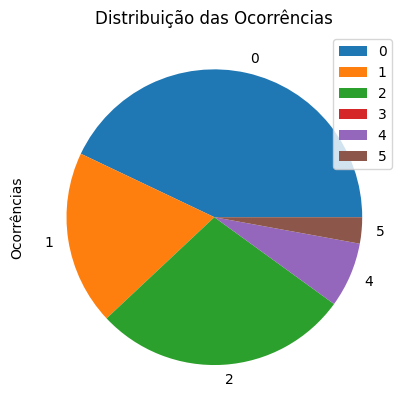

In [ ]:
def gerar_grafico_linhas(palavras, ocorrencias):
  df = pd.DataFrame({
      'Palavras': palavras,
      'Ocorrências': ocorrencias
  })
  df.plot(kind='pie', x='Palavras', y='Ocorrências', title='Distribuição das Ocorrências')
  plt.show()


gerar_grafico_linhas(palavras, ocorrencias)


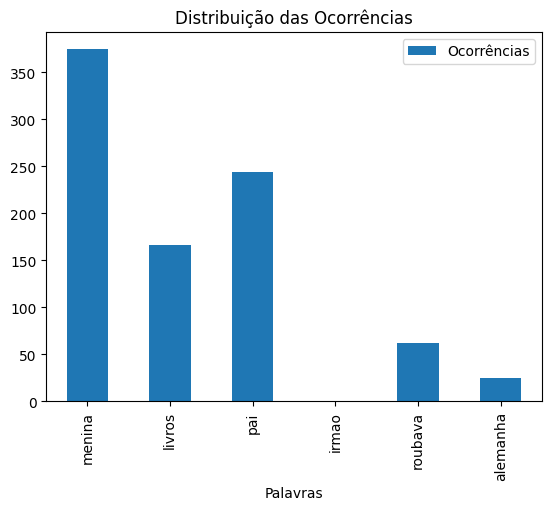

In [ ]:
#criar grafico de barras
def gerar_grafico_barras(palavras, ocorrencias):
  df = pd.DataFrame({
      'Palavras': palavras,
      'Ocorrências': ocorrencias
  })
  df.plot(kind='bar', x='Palavras', y='Ocorrências', title='Distribuição das Ocorrências')
  plt.show()


gerar_grafico_barras(palavras, ocorrencias)

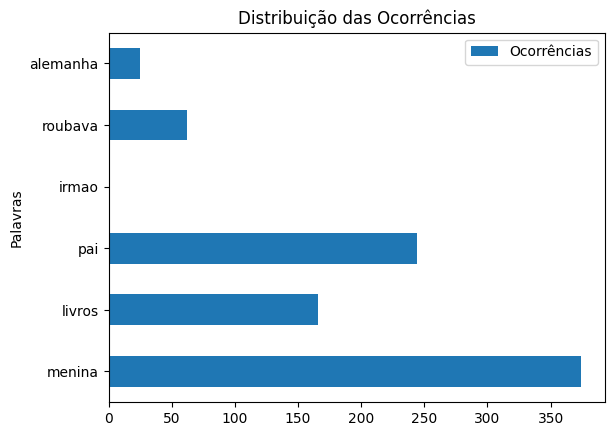

In [ ]:
def gerar_grafico_linhas(palavras, ocorrencias):
  df = pd.DataFrame({
      'Palavras': palavras,
      'Ocorrências': ocorrencias
  })
  df.plot(kind='barh', x='Palavras', y='Ocorrências', title='Distribuição das Ocorrências')
  plt.show()


gerar_grafico_linhas(palavras, ocorrencias)


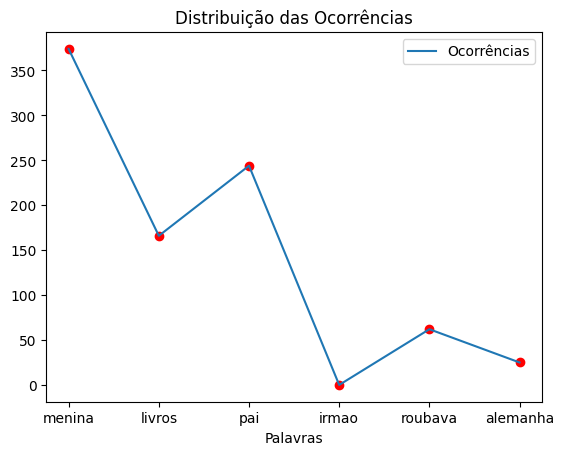

In [ ]:
def gerar_grafico_linhas(palavras, ocorrencias):
  df = pd.DataFrame({
      'Palavras': palavras,
      'Ocorrências': ocorrencias
  })
  df.plot(kind='line', x='Palavras', y='Ocorrências', title='Distribuição das Ocorrências')
  plt.scatter(df['Palavras'], df['Ocorrências'], color='r', label='Pontos')
  plt.show()


gerar_grafico_linhas(palavras, ocorrencias)
